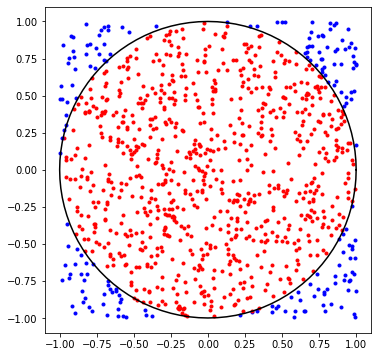

MC approximation to pi based on 1000 samples is 3.252


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# set random generator 
rng = np.random.default_rng(12345)

# generate N uniformly distributed random numbers a square [-1,1]x[-1,1]
N = 1000
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

# plot points with colour determined by the value of r
fig = plt.figure(figsize=(6,6))

r = np.sqrt(x**2 + y**2)
total = 0
for i in range(N):
    if r[i] <= 1:
        plt.plot(x[i], y[i], '.r')
        total += 1
    else:
        plt.plot(x[i], y[i], '.b')

# plot unit circle
t = np.linspace(0, 2*np.pi, 101)
plt.plot(np.cos(t), np.sin(t), 'k')

plt.axis('square')
plt.show()

my_pi = 4 * (total/N)

print("MC approximation to pi based on", N, "samples is", my_pi)

In [3]:
def Monte_carlo_European_call(S, K, T, r, sigma, N):
    
    # initial asset price
    S0 = S 
    
    # X follows a standard normal dist.
    X = rng.normal(0, 1, N)
    
    # the distribution of asset prices at the expiration of the option
    S_T = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)
    
    # the payoff of european call option at expiration
    fS_T = np.exp(-r*T) * np.maximum(S_T-K, 0)
    
    # the option value by taking the expected discounted payoff
    value = np.mean(fS_T)
    
    return value

In [4]:
# Parameters
S = 140
K = 110
T = 1
r = 0.05
sigma = 0.3
N = 10**4

# Calculate option prices using Monte Carlo and Black-Scholes methods
MC_price = Monte_carlo_European_call(S, K, T, r, sigma, N)

# Display the results
print("The expected discounted payoff from Monte Carlo: ", round(MC_price, 4))

The expected discounted payoff from Monte Carlo:  38.7388


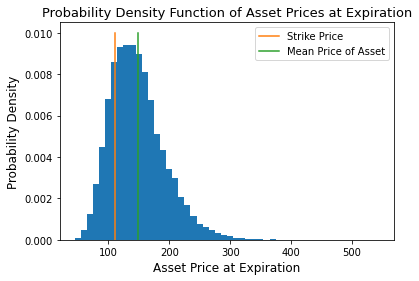

The Mean of Asset Price at Expiration:  147.7774


In [5]:
# Parameters
S = 140
K = 110
T = 1
r = 0.05
sigma = 0.3
N = 10**4


# set initial condition
S0 = S

X = rng.normal(0, 1, N)
S_T = S0 * np.exp((r-0.5*sigma**2)*T + sigma*np.sqrt(T)*X)

plt.hist(S_T, bins=50, density=True)
plt.xlabel("Asset Price at Expiration", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.title("Probability Density Function of Asset Prices at Expiration", fontsize=13)

# vertical line at strike price
plt.plot([K, K], [0, 0.01], )
plt.plot([np.mean(S_T), np.mean(S_T)], [0, 0.01])
plt.legend(["Strike Price", "Mean Price of Asset"])

plt.show()

print("The Mean of Asset Price at Expiration: ", np.round(np.mean(S_T), 4))